**Nithun Selva and Saad Khan**

Spring 2025

CS 444: Deep Learning

#### Project 4: Transformers

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=4)

# Automatically reload your external source code
%load_ext autoreload
%autoreload 2

2025-05-18 11:26:08.508818: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-18 11:26:08.526917: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-18 11:26:08.526931: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-18 11:26:08.527422: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-18 11:26:08.530735: I tensorflow/core/platform/cpu_feature_guar

![Some fun](images/transformer2.png)

## Task 5: Create GPT networks

With the Transformer Block and other network components implemented, let's build an actual transformer! We are implementing a transformer that follows the design of OpenAI's GPT line of neural networks. Therefore, the network class is called `GPT` (still inherits from `DeepNetwork` like usual). Specific GPT networks that you will construct will be child classes of `GPT` (much like `ResNet8` and `ResNet18` were child classes of `ResNet`).

### 5a. Building `GPTPico1`

Let's build a minimal GPT that consists of only one Transformer Block. This network, `GPTPico1`, has the following architecture:
1. Embedding layer
2. Positional encoding block.
3. Transformer block (1x)
4. Dense output layer

Implement and test the following required methods:
- `GPT`: constructor.
- `GPT`: `__call__` method. Forward pass through the transformer.
- `GPTPico1`: constructor. Assemble the net (*see above*).

In [2]:
from gpts import GPT, GPTPico1

#### Test: `loss` (temporal cross-entropy)

In [5]:
mygpt = GPT(seq_len=4, padding_char_enc=10)
mygpt.loss_name = 'temporal_cross_entropy'

tf.random.set_seed(1)
y_pred = tf.random.uniform(shape=(5, 4, 12), maxval=1, dtype=tf.float32)
y_true = tf.random.uniform(shape=(5, 4), maxval=11, dtype=tf.int32)

# Test 1: no masking the padding char
loss = mygpt.loss(y_pred, y_true, mask_padding_preds=False)
print(f'When not masking out the padding char, your loss is {loss.numpy():.4f} and it should be 0.9513.')
# Test 2: masking the padding char
loss = mygpt.loss(y_pred, y_true)
print(f'When masking out the padding char, your loss is {loss.numpy():.4f} and it should be 0.9442.')

When not masking out the padding char, your loss is 0.9513 and it should be 0.9513.
When masking out the padding char, your loss is 0.9442 and it should be 0.9442.


#### Test: `GPTPico1` architecture

In [7]:
mypicogpt = GPTPico1(vocab_sz=9, seq_len=15, padding_char_enc=5)
mypicogpt.compile(loss='temporal_cross_entropy')

---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 15, 9]
TransformerBlock_0:
	TransformerBlock_0_mlp:
	Dropout layer output(TransformerBlock_0_mlp_dropout) shape: [1, 15, 24]
	Dense layer output(TransformerBlock_0_mlp_dense2) shape: [1, 15, 24]
	Dense layer output(TransformerBlock_0_mlp_dense1) shape: [1, 15, 96]
	TransformerBlock_0_mha:
	Dropout layer output(TransformerBlock_0_mha_dropout) shape: [1, 15, 24]
	Dense layer output(TransformerBlock_0_mha_dense_proj) shape: [1, 15, 24]
	TransformerBlock_0_mha_attn:
	Dropout layer output(TransformerBlock_0_mha_attn_dropout) shape: [1, 4, 15, 15]
	TransformerBlock_0_mha_qkv:
	Dense layer output(TransformerBlock_0_mha_qkv_V) shape: [1, 15, 24]
	Dense layer output(TransformerBlock_0_mha_qkv_K) shape: [1, 15, 24]
	Dense layer output(TransformerBlock_0_mha_qkv_Q) shape: [1, 15, 24]
PositionalEncodingBlock:
	Dropout layer output(PositionalEncodingBlock_dropout) shape: [1, 15, 24]
	Po

The above cell should print out:

```
---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 15, 9]
TransformerBlock_0:
	TransformerBlock_0/MLP:
	Dropout layer output(TransformerBlock_0/MLP/dropout) shape: [1, 15, 24]
	Dense layer output(TransformerBlock_0/MLP/dense_1) shape: [1, 15, 24]
	Dense layer output(TransformerBlock_0/MLP/dense_0) shape: [1, 15, 96]
	TransformerBlock_0/multihead_attention:
	Dropout layer output(TransformerBlock_0/multihead_attention/dropout) shape: [1, 15, 24]
	Dense layer output(TransformerBlock_0/multihead_attention/dense_1) shape: [1, 15, 24]
	TransformerBlock_0/multihead_attention/attention:
	Dropout layer output(TransformerBlock_0/multihead_attention/attention/dropout) shape: [1, 4, 15, 15]
	TransformerBlock_0/multihead_attention/qkv_block:
	Dense layer output(TransformerBlock_0/multihead_attention/qkv_block/dense_v) shape: [1, 15, 24]
	Dense layer output(TransformerBlock_0/multihead_attention/qkv_block/dense_k) shape: [1, 15, 24]
	Dense layer output(TransformerBlock_0/multihead_attention/qkv_block/dense_q) shape: [1, 15, 24]
PositionalEncodingBlock:
	Dropout layer output(PositionalEncodingBlock/dropout) shape: [1, 15, 24]
	Positional encoding layer output(PositionalEncodingBlock/positional_enc_layer) shape: [1, 15, 24]
Embedding layer output(EmbeddingLayer) shape: [1, 15, 24]
---------------------------------------------------------------------------
```

### 5b. `GPTPico1` overfit test

Let's verify that your `GPTPico1` works by overfitting a small amount of fake data.

Running the following cell should result in a training loss of ~`0.03` by 500 training epochs. The training loss after 1 epoch should be ~`5.0`.

In [12]:
tf.random.set_seed(0)
mypicogpt = GPTPico1(vocab_sz=100, seq_len=5, padding_char_enc=99)
mypicogpt.compile(loss='temporal_cross_entropy')

tf.random.set_seed(1)
x_dev_test = tf.random.uniform(shape=(10, 5), maxval=100, dtype=tf.int32)
y_dev_test = tf.random.uniform(shape=(10, 5), maxval=100, dtype=tf.int32)
train_loss_hist, _, _, _ = mypicogpt.fit(x_dev_test, y_dev_test, x_dev_test, y_dev_test, batch_size=10, max_epochs=500)

---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 5, 100]
TransformerBlock_0:
	TransformerBlock_0_mlp:
	Dropout layer output(TransformerBlock_0_mlp_dropout) shape: [1, 5, 24]
	Dense layer output(TransformerBlock_0_mlp_dense2) shape: [1, 5, 24]
	Dense layer output(TransformerBlock_0_mlp_dense1) shape: [1, 5, 96]
	TransformerBlock_0_mha:
	Dropout layer output(TransformerBlock_0_mha_dropout) shape: [1, 5, 24]
	Dense layer output(TransformerBlock_0_mha_dense_proj) shape: [1, 5, 24]
	TransformerBlock_0_mha_attn:
	Dropout layer output(TransformerBlock_0_mha_attn_dropout) shape: [1, 4, 5, 5]
	TransformerBlock_0_mha_qkv:
	Dense layer output(TransformerBlock_0_mha_qkv_V) shape: [1, 5, 24]
	Dense layer output(TransformerBlock_0_mha_qkv_K) shape: [1, 5, 24]
	Dense layer output(TransformerBlock_0_mha_qkv_Q) shape: [1, 5, 24]
PositionalEncodingBlock:
	Dropout layer output(PositionalEncodingBlock_dropout) shape: [1, 5, 24]
	Positional e

## Task 6: Train GPTs on the Addition Dataset

In task, you will train small transformers on the Addition dataset, have the transformers generate the answers to addition problems, and analyze the properties of the trained transformers.

### 6a. Train `GPTPico1` on a small amount of Addition Dataset expressions

In the cell below, train `GPTPico1` on the first 25 samples from the Addition dataset. Use:
- the training set as the validation set
- the default random seed.
- a patience of `15` (no learning rate decay).
- a batch size of `25` (*batch gradient descent*).

You should get a final training loss of less than `0.20`.

Make a well-labeled plot showing the training loss over the course of training.

In [5]:
from addition_dataset import *

In [7]:
x_train, y_train, _, _, char2ind_map = get_addition_dataset(N=25, val_prop=0.)
vocab_sz = len(char2ind_map)
seq_len = x_train.shape[1]


print('First 5 expressions (encoded)')
print(x_train[:5].numpy())
print('First 5 target labels (encoded)')
print(y_train[:5].numpy())

First 5/25 expressions:
  ['4', '7', '+', '5', '1', '=', '9', '8', '.', '#']
  ['7', '5', '+', '9', '5', '=', '1', '7', '0', '.']
  ['3', '+', '1', '4', '=', '1', '7', '.', '#', '#']
  ['8', '2', '+', '9', '4', '=', '1', '7', '6', '.']
  ['2', '4', '+', '3', '1', '=', '5', '5', '.', '#']
First 5 expressions (encoded)
[[ 4  7 10  5  1 11  9  8 12]
 [ 7  5 10  9  5 11  1  7  0]
 [ 3 10  1  4 11  1  7 12 13]
 [ 8  2 10  9  4 11  1  7  6]
 [ 2  4 10  3  1 11  5  5 12]]
First 5 target labels (encoded)
[[ 7 10  5  1 11  9  8 12 13]
 [ 5 10  9  5 11  1  7  0 12]
 [10  1  4 11  1  7 12 13 13]
 [ 2 10  9  4 11  1  7  6 12]
 [ 4 10  3  1 11  5  5 12 13]]


In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(0)

padding_char_enc = char2ind_map['#']

# Instantiate GPTPico1
gpt_add = GPTPico1(vocab_sz=vocab_sz,
                   seq_len=seq_len,
                   padding_char_enc=padding_char_enc)
gpt_add.compile(loss='temporal_cross_entropy', optimizer='adam')

# Fit the model
print("Starting training for Task 6a...")
train_loss_hist, val_loss_hist, val_acc_hist, epochs_trained = gpt_add.fit(
    x=x_train,
    y=y_train,
    x_val=x_train,
    y_val=y_train,
    batch_size=25,   
    patience=7, # Changed this, 15 was too long, caused long plateau
    lr_max_decays=0,
    val_every=1
)

---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 9, 14]
TransformerBlock_0:
	TransformerBlock_0_mlp:
	Dropout layer output(TransformerBlock_0_mlp_dropout) shape: [1, 9, 24]
	Dense layer output(TransformerBlock_0_mlp_dense2) shape: [1, 9, 24]
	Dense layer output(TransformerBlock_0_mlp_dense1) shape: [1, 9, 96]
	TransformerBlock_0_mha:
	Dropout layer output(TransformerBlock_0_mha_dropout) shape: [1, 9, 24]
	Dense layer output(TransformerBlock_0_mha_dense_proj) shape: [1, 9, 24]
	TransformerBlock_0_mha_attn:
	Dropout layer output(TransformerBlock_0_mha_attn_dropout) shape: [1, 4, 9, 9]
	TransformerBlock_0_mha_qkv:
	Dense layer output(TransformerBlock_0_mha_qkv_V) shape: [1, 9, 24]
	Dense layer output(TransformerBlock_0_mha_qkv_K) shape: [1, 9, 24]
	Dense layer output(TransformerBlock_0_mha_qkv_Q) shape: [1, 9, 24]
PositionalEncodingBlock:
	Dropout layer output(PositionalEncodingBlock_dropout) shape: [1, 9, 24]
	Positional en


Training finished after 420 epochs.
Final training loss: 0.1488


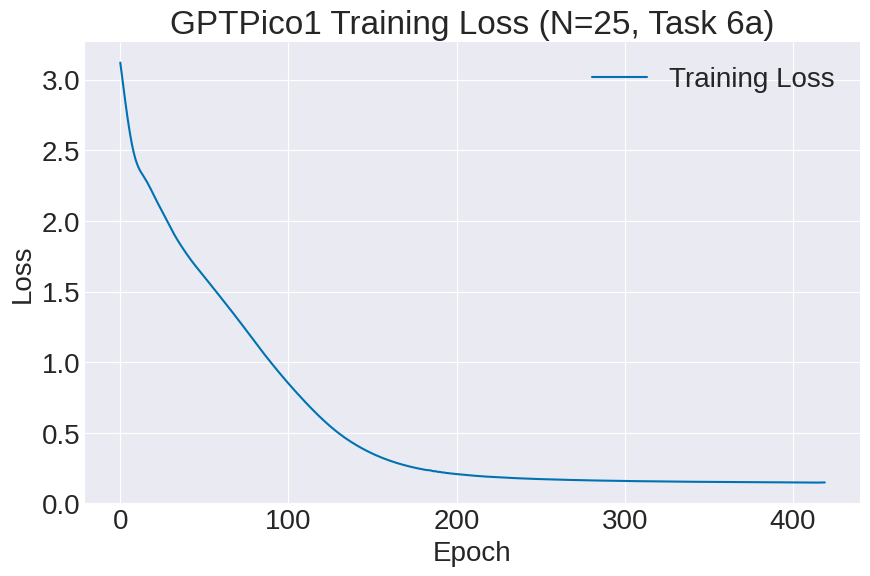

In [21]:
print(f"\nTraining finished after {epochs_trained} epochs.")
if train_loss_hist:
    print(f"Final training loss: {train_loss_hist[-1]:.4f}")

# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss_hist, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('GPTPico1 Training Loss (N=25, Task 6a)')
plt.legend()
plt.grid(True)
plt.show()

### 6b. Test `generate_sequence`

This is the method that allows you to prompt your transformer and have it generate text that follows your prompt.

Test it out in the cell below on your GPTPico1 network **trained** on the first 25 addition expressions (*the one that yielded a final training loss of less than `0.20` above*) by prompting it with the left-hand side of a single one of the 25  training samples.

For example, if you prompt `'47+51='` (the 1st sample) it should output `98.` (or `'47+51=98.'` if you have chatbot-style character-by-character live printing turned on as it generates).

Another example prompt is `'75+95='` (2nd sample), which should output `170.` (or `'75+95=170.'` if live printing is on).

**Note:** The end character is set to `'.'`.

In [22]:
ind2char_map = make_ind2char_mapping(char2ind_map)

prompt = '47+51='
answer = gpt_add.generate_sequence(prompt=prompt,
                                   length=seq_len,
                                   char2ind_map=char2ind_map,
                                   ind2char_map=ind2char_map,
                                   end_char='.')

prompt = '75+95='
answer = gpt_add.generate_sequence(prompt=prompt,
                                   length=seq_len,
                                   char2ind_map=char2ind_map,
                                   ind2char_map=ind2char_map,
                                   end_char='.')

47+51=98.
75+95=170.


### 6c. Verify transformer overfits all 25 addition expressions

Once you have the above `generate_sequence` test working, "script" your GPT to generate the answers to all 25 addition expressions in the current subset of the addition dataset. When you print out the generated answers, also print out the true answer so that you can visually scan the correctness of the outputs. Your `GPTPico1` should get all or the vast majority of additions correct.

**Reminders:**
- Make sure you set the end character to the appropriate char.
- Use the `convert_int2str` and `split_sum_and_answer` methods that you wrote to prepare the prompts and expected answers for each sample.

In [19]:
from addition_dataset import convert_int2str, split_sum_and_answer

In [36]:
# First convert int-encoded tokens to string representation
ind2char_map = make_ind2char_mapping(char2ind_map)
x_str = convert_int2str(x_int=x_train.numpy(), ind2char_map=ind2char_map)

# Now use split_sum_and_answer on the string representation
prompts, correct_answers = split_sum_and_answer(x_str)

print("Verifying transformer on all 25 addition expressions (Task 6c):")
num_correct = 0
for i in range(len(prompts)):
    current_prompt = prompts[i]
    # correct_answers includes padding (e.g., "98.##"). Clean it.
    expected_answer_clean = correct_answers[i].split('#')[0]

    print(f"\nExpression {i+1}:")
    print(f"  Prompt: {current_prompt}")
    print(f"  Expected answer: {expected_answer_clean}")

    # Generate answer using the trained model (gpt_add from 6a)
    # Set live_print=False to control output format here.
    generated_chars = gpt_add.generate_sequence(prompt=current_prompt,
                                                   length=seq_len, # Max length to generate
                                                   char2ind_map=char2ind_map,
                                                   ind2char_map=ind2char_map,
                                                   end_char='.',
                                                   live_print=False)
    generated_answer = "".join(generated_chars)
    print(f"  Generated answer: {generated_answer}")

    # For comparison, strip the period from both strings
    expected_answer_clean = expected_answer_clean.rstrip('.')
    generated_answer = generated_answer.rstrip('.')
    if generated_answer == expected_answer_clean:
        print("  Result: CORRECT")
        num_correct += 1
    else:
        print("  Result: INCORRECT")
    print("-" * 20)

print(f"\nSummary: {num_correct}/{len(prompts)} correct.")

Verifying transformer on all 25 addition expressions (Task 6c):

Expression 1:
  Prompt: 47+51=
  Expected answer: 98.
  Generated answer: 98.
  Result: CORRECT
--------------------

Expression 2:
  Prompt: 75+95=
  Expected answer: 170
  Generated answer: 170.
  Result: CORRECT
--------------------

Expression 3:
  Prompt: 3+14=
  Expected answer: 17.
  Generated answer: 17.
  Result: CORRECT
--------------------

Expression 4:
  Prompt: 82+94=
  Expected answer: 176
  Generated answer: 176.
  Result: CORRECT
--------------------

Expression 5:
  Prompt: 24+31=
  Expected answer: 55.
  Generated answer: 55.
  Result: CORRECT
--------------------

Expression 6:
  Prompt: 86+42=
  Expected answer: 128
  Generated answer: 128.
  Result: CORRECT
--------------------

Expression 7:
  Prompt: 27+82=
  Expected answer: 109
  Generated answer: 109.
  Result: CORRECT
--------------------

Expression 8:
  Prompt: 25+40=
  Expected answer: 65.
  Generated answer: 65.
  Result: CORRECT
----------

### 6d. Transformer learns to add

In the cell below, train `GPTPico1` on an addition dataset with `25000` expressions the default configuration (e.g. 90/10 train/val split). Use default network and training hyperparameters except for:
- batch size of `1024`.
- patience of `15`.
- learning rate patience of `5`.
- at most `4` learning rate decays.
- at most `1200` training epochs.

Do the following after training your net:
1. Create a well-labeled plot showing the training and validation loss over epochs.
2. Print out of the generated answers for the 1st 50 **training AND validation set** samples separately. Each print out should show the prompt (left-hand side of `=`, including the `=`), the answer generated by the transformer, and the correct answer — all in a neat, easy to read format.

*If everything is working as expected, you should be able to achieve a validation loss in the 0.9s*

In [3]:
from addition_dataset import *

In [5]:
# Load the larger dataset
N_large = 25000
val_prop_large = 0.1 # 90/10 split
x_train_large, y_train_large, x_val_large, y_val_large, char2ind_map_large = get_addition_dataset(
    N=N_large,
    val_prop=val_prop_large
)

vocab_sz_large = len(char2ind_map_large)
seq_len_large = x_train_large.shape[1]
padding_char_enc_large = char2ind_map_large['#']

First 5/25000 expressions:
  ['4', '7', '+', '5', '1', '=', '9', '8', '.', '#']
  ['7', '5', '+', '9', '5', '=', '1', '7', '0', '.']
  ['3', '+', '1', '4', '=', '1', '7', '.', '#', '#']
  ['8', '2', '+', '9', '4', '=', '1', '7', '6', '.']
  ['2', '4', '+', '3', '1', '=', '5', '5', '.', '#']


In [6]:
tf.keras.backend.clear_session()
tf.random.set_seed(0)

# Your code here
gpt_add1 = GPTPico1(vocab_sz=vocab_sz_large,
                    seq_len=seq_len_large,
                    padding_char_enc=padding_char_enc_large)
gpt_add1.compile(loss='temporal_cross_entropy', optimizer='adam', lr=1e-3)

# Fit the model with specified hyperparameters
batch_size_large = 1024
patience_fit = 10 # Reducing patience 
lr_patience_fit = 5
lr_max_decays_fit = 4
max_epochs_fit = 1200 
lr_decay_factor_fit = 0.5 

print("Starting training GPTPico1 on large dataset (Task 6d)...")
train_loss_hist_large, val_loss_hist_large, val_acc_hist_large, epochs_trained_large = gpt_add1.fit(
    x=x_train_large,
    y=y_train_large,
    x_val=x_val_large,
    y_val=y_val_large,
    batch_size=batch_size_large,
    max_epochs=max_epochs_fit,
    val_every=1, 
    verbose=True,
    patience=patience_fit,
    lr_patience=lr_patience_fit,
    lr_decay_factor=lr_decay_factor_fit,
    lr_max_decays=lr_max_decays_fit
)

---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 9, 14]
TransformerBlock_0:
	TransformerBlock_0_mlp:
	Dropout layer output(TransformerBlock_0_mlp_dropout) shape: [1, 9, 24]
	Dense layer output(TransformerBlock_0_mlp_dense2) shape: [1, 9, 24]
	Dense layer output(TransformerBlock_0_mlp_dense1) shape: [1, 9, 96]
	TransformerBlock_0_mha:
	Dropout layer output(TransformerBlock_0_mha_dropout) shape: [1, 9, 24]
	Dense layer output(TransformerBlock_0_mha_dense_proj) shape: [1, 9, 24]
	TransformerBlock_0_mha_attn:
	Dropout layer output(TransformerBlock_0_mha_attn_dropout) shape: [1, 4, 9, 9]
	TransformerBlock_0_mha_qkv:
	Dense layer output(TransformerBlock_0_mha_qkv_V) shape: [1, 9, 24]
	Dense layer output(TransformerBlock_0_mha_qkv_K) shape: [1, 9, 24]
	Dense layer output(TransformerBlock_0_mha_qkv_Q) shape: [1, 9, 24]
PositionalEncodingBlock:
	Dropout layer output(PositionalEncodingBlock_dropout) shape: [1, 9, 24]
	Positional en

2025-05-18 11:26:30.128852: I external/local_xla/xla/service/service.cc:168] XLA service 0x9569340 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2025-05-18 11:26:30.128866: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2025-05-18 11:26:30.164332: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1747581990.875844 3085717 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2025-05-18 11:26:30.878294: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.


Tensor("Reshape_8:0", shape=(996, 9), dtype=float32)
Tensor("Reshape_8:0", shape=(64, 9), dtype=float32)
Epoch 1/1200 - Train Loss: 2.5640, Val Loss: 2.2606, Val Acc: 0.3842
Epoch 1 completed in 3.71 seconds.
Epoch 2/1200 - Train Loss: 2.1112, Val Loss: 1.9798, Val Acc: 0.4005
Epoch 2 completed in 0.72 seconds.
Epoch 3/1200 - Train Loss: 1.8985, Val Loss: 1.8229, Val Acc: 0.4058
Epoch 3 completed in 0.72 seconds.
Epoch 4/1200 - Train Loss: 1.7585, Val Loss: 1.6889, Val Acc: 0.4084
Epoch 4 completed in 0.74 seconds.
Epoch 5/1200 - Train Loss: 1.6359, Val Loss: 1.5775, Val Acc: 0.4140
Epoch 5 completed in 0.72 seconds.
Epoch 6/1200 - Train Loss: 1.5504, Val Loss: 1.5178, Val Acc: 0.4188
Epoch 6 completed in 0.72 seconds.
Epoch 7/1200 - Train Loss: 1.5061, Val Loss: 1.4853, Val Acc: 0.4235
Epoch 7 completed in 0.79 seconds.
Epoch 8/1200 - Train Loss: 1.4791, Val Loss: 1.4639, Val Acc: 0.4244
Epoch 8 completed in 0.80 seconds.
Epoch 9/1200 - Train Loss: 1.4607, Val Loss: 1.4486, Val Acc: 0


Training on large dataset finished after 1064 epochs.
Final validation loss: 0.9546


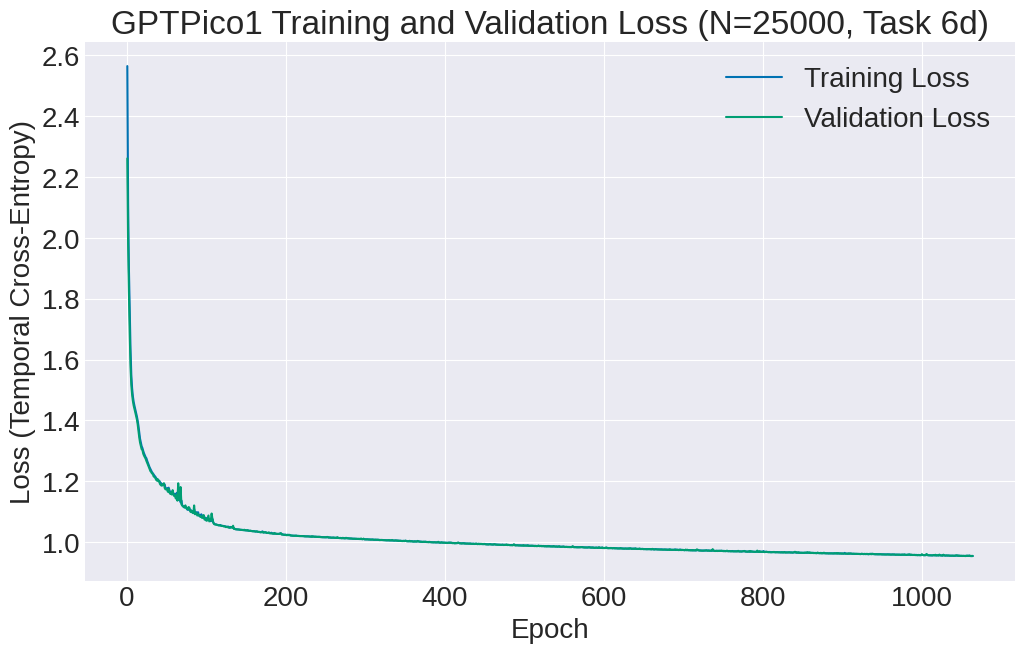

In [7]:
print(f"\nTraining on large dataset finished after {epochs_trained_large} epochs.")
if val_loss_hist_large:
    print(f"Final validation loss: {val_loss_hist_large[-1]:.4f}")
else:
    print("No validation loss recorded (training might have stopped early or max_epochs was 0).")

plt.figure(figsize=(12, 7))
plt.plot(np.arange(1, len(train_loss_hist_large) + 1), train_loss_hist_large, label='Training Loss')
val_epochs = np.arange(1, len(val_loss_hist_large) + 1) 
plt.plot(val_epochs, val_loss_hist_large, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (Temporal Cross-Entropy)')
plt.title(f'GPTPico1 Training and Validation Loss (N={N_large}, Task 6d)')
plt.legend()
# plt.ylim(bottom=0) # Loss should not be negative
plt.show()

In [8]:
x_train = x_train_large
x_val = x_val_large
char2ind_map = char2ind_map_large
seq_len = seq_len_large

In [9]:
N_show = 50
x_splits = [x_train, x_val]
split_labels = ['train', 'val']

for i in range(2):
    x = x_splits[i]
    split = split_labels[i]

    print(50*'=')
    print(split)
    print(50*'=')
    N = len(x)

    ind2char_map = make_ind2char_mapping(char2ind_map)
    x_str = convert_int2str(x_int=x.numpy(), ind2char_map=ind2char_map)
    prompts, correct_answers = split_sum_and_answer(x_str)


    for i in range(N_show):
        curr_prompt = prompts[i]
        curr_ans = correct_answers[i]
        answer = gpt_add1.generate_sequence(prompt=curr_prompt,
                                            length=seq_len_large,
                                            char2ind_map=char2ind_map,
                                            ind2char_map=ind2char_map,
                                            end_char='.')
        print('Correct answer is:', curr_ans)
        print('---------------------')

train
47+51=98.
Correct answer is: 98.
---------------------
75+95=170.
Correct answer is: 170
---------------------
3+14=19.
Correct answer is: 17.#
---------------------
82+94=176.
Correct answer is: 176
---------------------
24+31=55.
Correct answer is: 55.
---------------------
86+42=128.
Correct answer is: 128
---------------------
27+82=109.
Correct answer is: 109
---------------------
25+40=65.
Correct answer is: 65.
---------------------
64+54=118.
Correct answer is: 118
---------------------
8+2=10.
Correct answer is: 10.##
---------------------
86+75=161.
Correct answer is: 161
---------------------
83+53=136.
Correct answer is: 136
---------------------
81+32=113.
Correct answer is: 113
---------------------
45+78=123.
Correct answer is: 123
---------------------
12+30=42.
Correct answer is: 42.
---------------------
12+45=57.
Correct answer is: 57.
---------------------
97+13=110.
Correct answer is: 110
---------------------
38+40=78.
Correct answer is: 78.
----------------

### 6e. Questions

**Question 4:** Look over the addition prompts and generated answers for mistakes.

a. What types of mistakes do you spot?

b. How close are the mistakes to the true answers?

c. Why do you think the transformer is making the mistakes it makes?

*If your transformer is not making mistakes, print out more prompts/answers or cut the training off a little earlier so the final validation loss is higher.*

<br/><br/>

**Question 5:** Have some fun and prompt your trained transformer with hand crafted addition prompt strings. Try to "trick" your transformer:

a. using valid prompts (i.e. up to 2 digits per operand). 

b. using invalid prompts. 

In both cases document where it does well and where it does not with specific examples.

<br/><br/>

**Question 6:** Add the following code to your GPT's temporal cross entropy loss code: `print(tf.reshape(act_at_correct, (N, T)))` The line of code prints the softmax netAct values produced by the net's output layer from the neuron coding the correct next token. Adapt as necessary to make it print these expected values. Run the code provided below. In some detail, interpret why the netActs are high or low in each case and why that makes sense.

<br/><br/>

**Question 7:** Following up from the previous question, notice how the netActs for the 1st char are small yet nonzero in all cases. Why does this happen and explain why the loss cannot get to exactly 0. 

**When you are done running Q6 and Q7, comment out the print out in the `loss` method.**

<br/><br/>

**Question 8:** In the cell below, call `generate_sequence` on one of the transformers and plug in a single prompt that yields an incorrect answer based on the above validation set print outs. In your call to `generate_sequence`, set the keyword argument `plot_probs` to `True`. Use the plots of the output layer netActs to explain what is going on when the network predicts the incorrect answer.

**Answer 4:** Most of the errors are off by 1-2 digits (39 instead of 40), but there are a few off by a lot (`9+72=73`). This happens a lot more for when one operand is 1 digit and the other is 2 digits, or when carrying is involved. This happens because the transformer is learning statistical patterns rather than the actual algorithm of addition.

**Answer 5:** The transformer struggles with prompts involving single digit operands, likely because it has not seen enough examples of these during training. For example, it correctly predicts `1+99=100.` but fails to predict `1+1=2.` or `0+0=0.`. It also fails with invalid prompts like `123+45=` generating just the terminal character and malformed expressions like `=12+34`, generating random characters.

**Answer 6:** We see that the netActs for positions after the = sign are high, which is good because it means the transformer is confident about its predictions, however the second digit in addition generally has lower netActs. The first example is lower confidence overall because one of the operands is a single digit, which the transformer has not seen enough of during training. The second and third examples have higher confidence because both operands are two digits, which the transformer has seen more of, and can also predict the placement of the = sign with 100% confidence as well. 

**Answer 7:** The first character has no preceding context, making it more difficult to predict. The loss cannot get to exactly 0 because perfect prediction would require softmax outputs of exactly 1.0 for the correct token and 0.0 for all others, but we will always have some uncertainty in the predictions, especially for the first character.

**Answer 8:** We can see that for `2+87`, the model correctly predicts the first digit 8 with high confidence (0.8), but then the right digit 9 is only the third most likely prediction, with 0 being the most likely and 8 being the second most likely with all netActs being ~0.1-0.2. This indicates that the model is confused about the second digit, likely due to the complexity of carrying in addition. 

In [16]:
def test_custom_prompts(model, char2ind_map, ind2char_map, seq_len, prompts):
    for prompt in prompts:
        print(f"Prompt: {prompt}")
        try:
            answer = model.generate_sequence(
                prompt=prompt,
                length=seq_len,
                char2ind_map=char2ind_map,
                ind2char_map=ind2char_map,
                end_char='.',
                live_print=False
            )
            print(f"Generated: {''.join(answer)}")
        except KeyError:
            print("ERROR: Prompt contains characters not in vocabulary")
        print("-" * 30)

# a. Valid prompts (up to 2 digits per operand)
valid_prompts = [
    "99+99=",    # Max 2-digit addition
    "0+0=",      # Zero case
    "1+99=",     # Large difference
    "1+1=",      
]

# b. Invalid or tricky prompts
invalid_prompts = [
    "123+45=",   # First operand > 2 digits
    "12+456=",   # Second operand > 2 digits  
    "=12+34",    # Reversed format
    "12+=34"     # Malformed expression
]

print("TESTING VALID PROMPTS:")
test_custom_prompts(gpt_add1, char2ind_map, ind2char_map, seq_len, valid_prompts)

print("\nTESTING INVALID PROMPTS:")
test_custom_prompts(gpt_add1, char2ind_map, ind2char_map, seq_len, invalid_prompts)

TESTING VALID PROMPTS:
Prompt: 99+99=
Generated: 198.
------------------------------
Prompt: 0+0=
Generated: 11.
------------------------------
Prompt: 1+99=
Generated: 100.
------------------------------
Prompt: 1+1=
Generated: 5.
------------------------------

TESTING INVALID PROMPTS:
Prompt: 123+45=
Generated: .
------------------------------
Prompt: 12+456=
Generated: .
------------------------------
Prompt: =12+34
Generated: 9.
------------------------------
Prompt: 12+=34
Generated: .
------------------------------


In [11]:
# Question 6 TODO: Replace in the code below:
# char2ind_map: with your char-to-int dictionary
# gpt_add1: with your trained net

prompts = [list('33+1=34.##'), list('33+10=43.#'), list('33+33=66.#')]
prompts_int_x, prompts_int_y = make_addition_samples_and_labels(prompts, char2ind_map)
prompts_int_x = tf.cast(prompts_int_x, tf.int32)
prompts_int_y = tf.cast(prompts_int_y, tf.int32)
net_acts = gpt_add1(prompts_int_x)
gpt_add1.loss(net_acts, prompts_int_y)


tf.Tensor(
[[0.09   1.     0.1093 0.0707 0.9167 0.1821 1.     0.     0.    ]
 [0.09   1.     0.1093 0.0893 1.     0.9867 0.8084 1.     0.    ]
 [0.09   1.     0.112  0.0993 1.     0.968  0.5952 1.     0.    ]], shape=(3, 9), dtype=float32)


<tf.Tensor: shape=(), dtype=float32, numpy=1.0339922>

2+87=

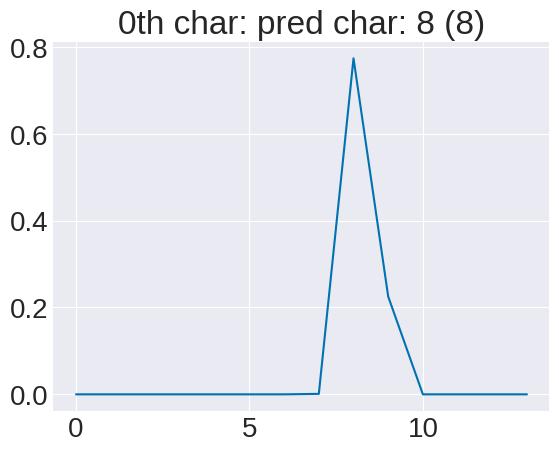

8

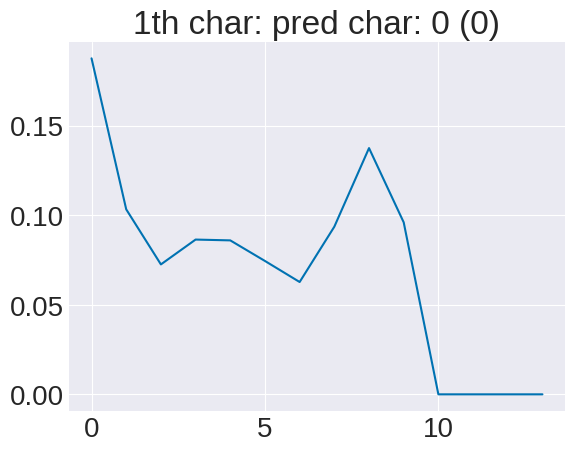

0

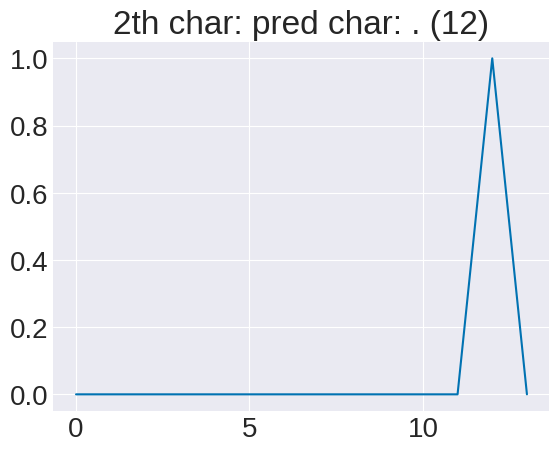

.


In [12]:
# Question 8.
# TODO: modify prompt to one that produces an incorrect output. Change any other variables to suit your conventions
prompt = '2+87='
answer = gpt_add1.generate_sequence(prompt=prompt,
                                length=seq_len,
                                char2ind_map=char2ind_map,
                                ind2char_map=ind2char_map,
                                end_char='.',
                                plot_probs=True)